In [111]:
import pandas as pd
bodies = ['auser', 'doganella', 'luco', 'petrignano', 'amiata', 'lupa', 'madonna_di_canneto', 'bilancino', 'arno']
kinds = ['aquifer', 'aquifer', 'aquifer', 'aquifer', 'waterspring', 'waterspring', 'waterspring', 'lake', 'river']
dfs = {n:pd.read_csv(f"../../data/raw/{k}/{n}.csv") for k, n in zip(kinds, bodies)}

In [112]:
import missingno as msno
import matplotlib.pyplot as plt

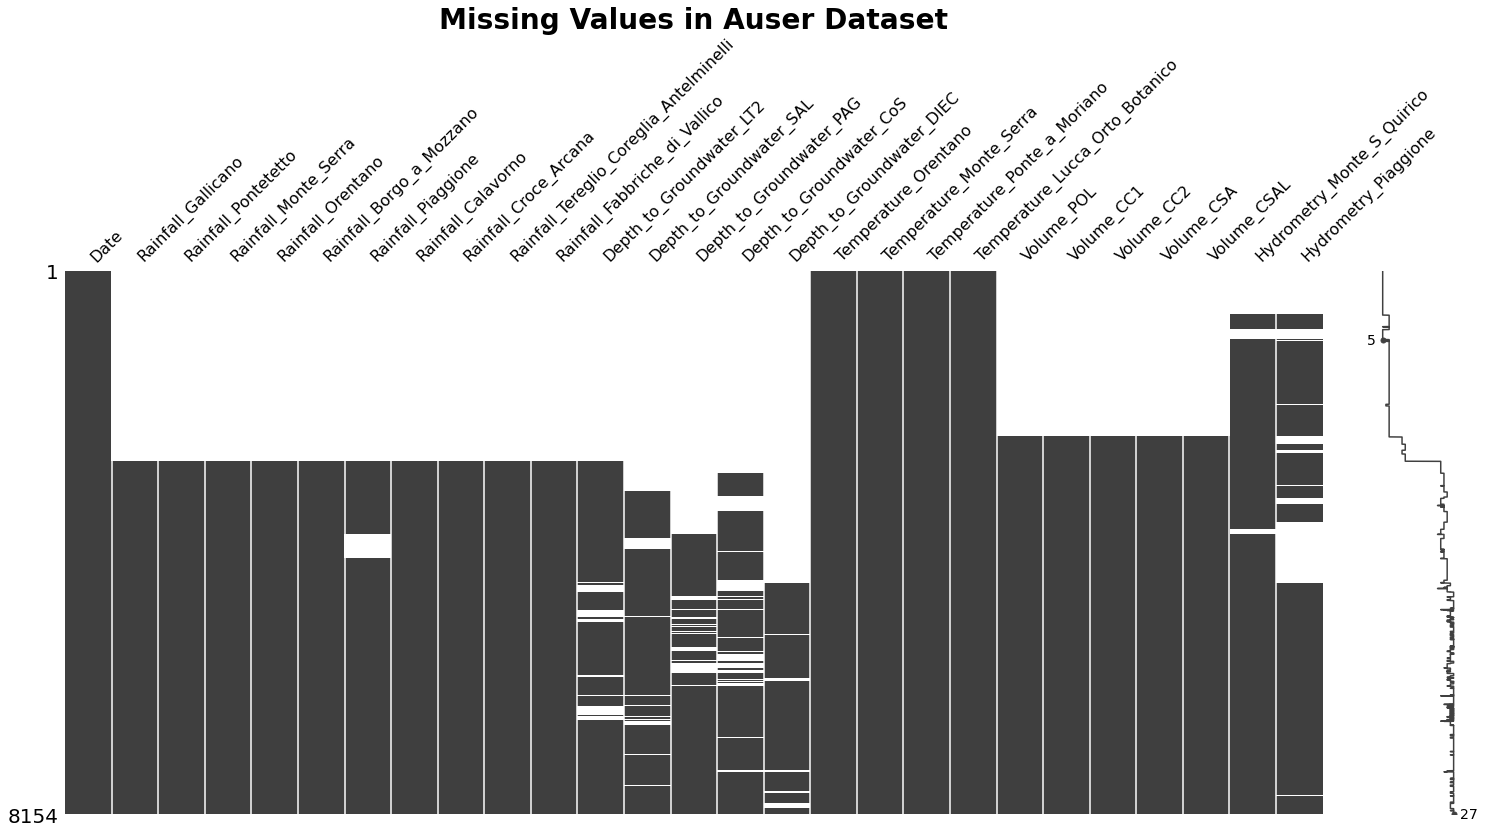

In [113]:
fig = msno.matrix(dfs['auser'], inline=False)
fig.axes.set_title('Missing Values in Auser Dataset', fontsize=28, fontweight='bold')
plt.show()

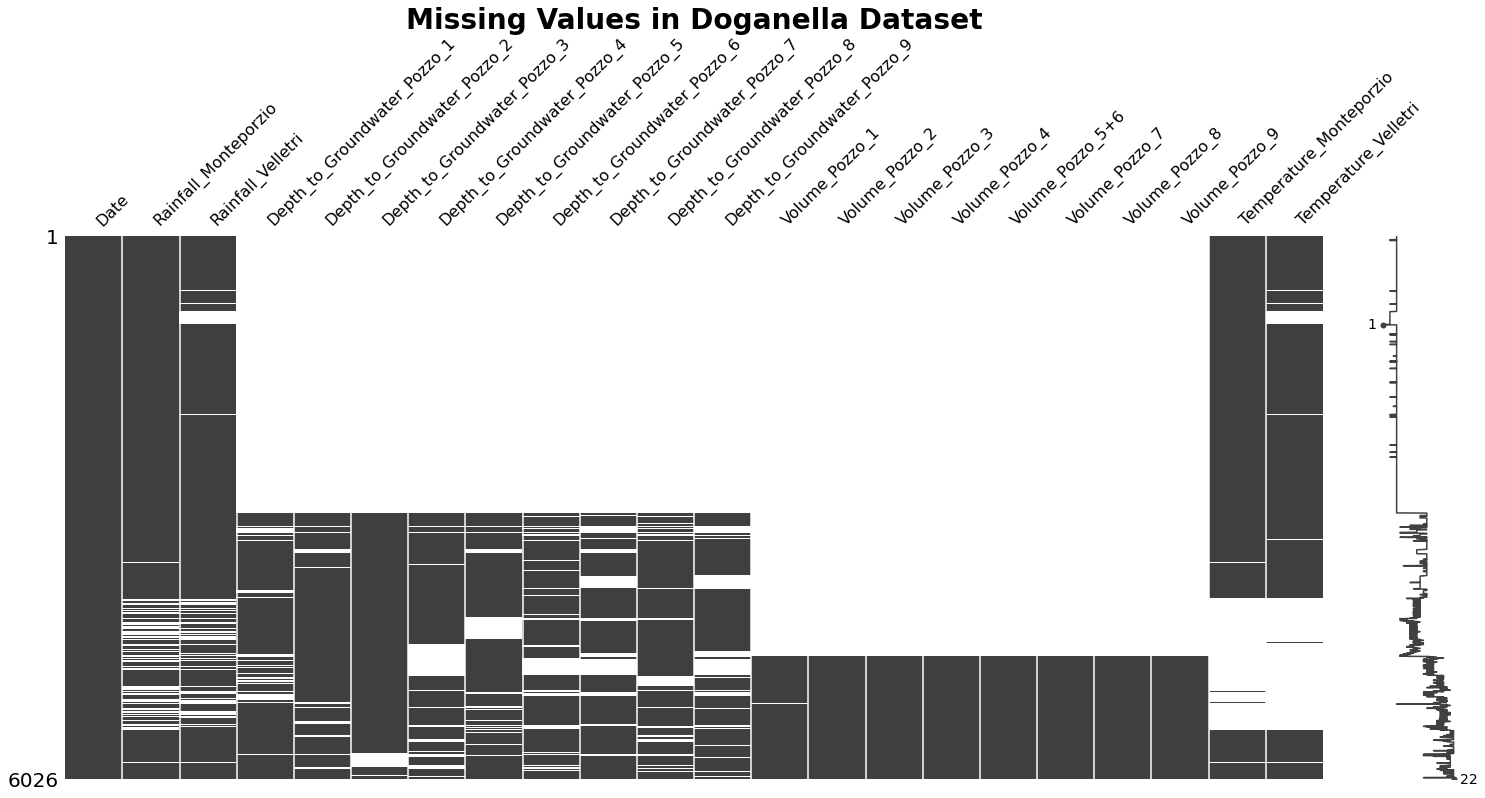

In [114]:
fig = msno.matrix(dfs['doganella'], inline=False)
fig.axes.set_title('Missing Values in Doganella Dataset', fontsize=28, fontweight='bold')
plt.show()

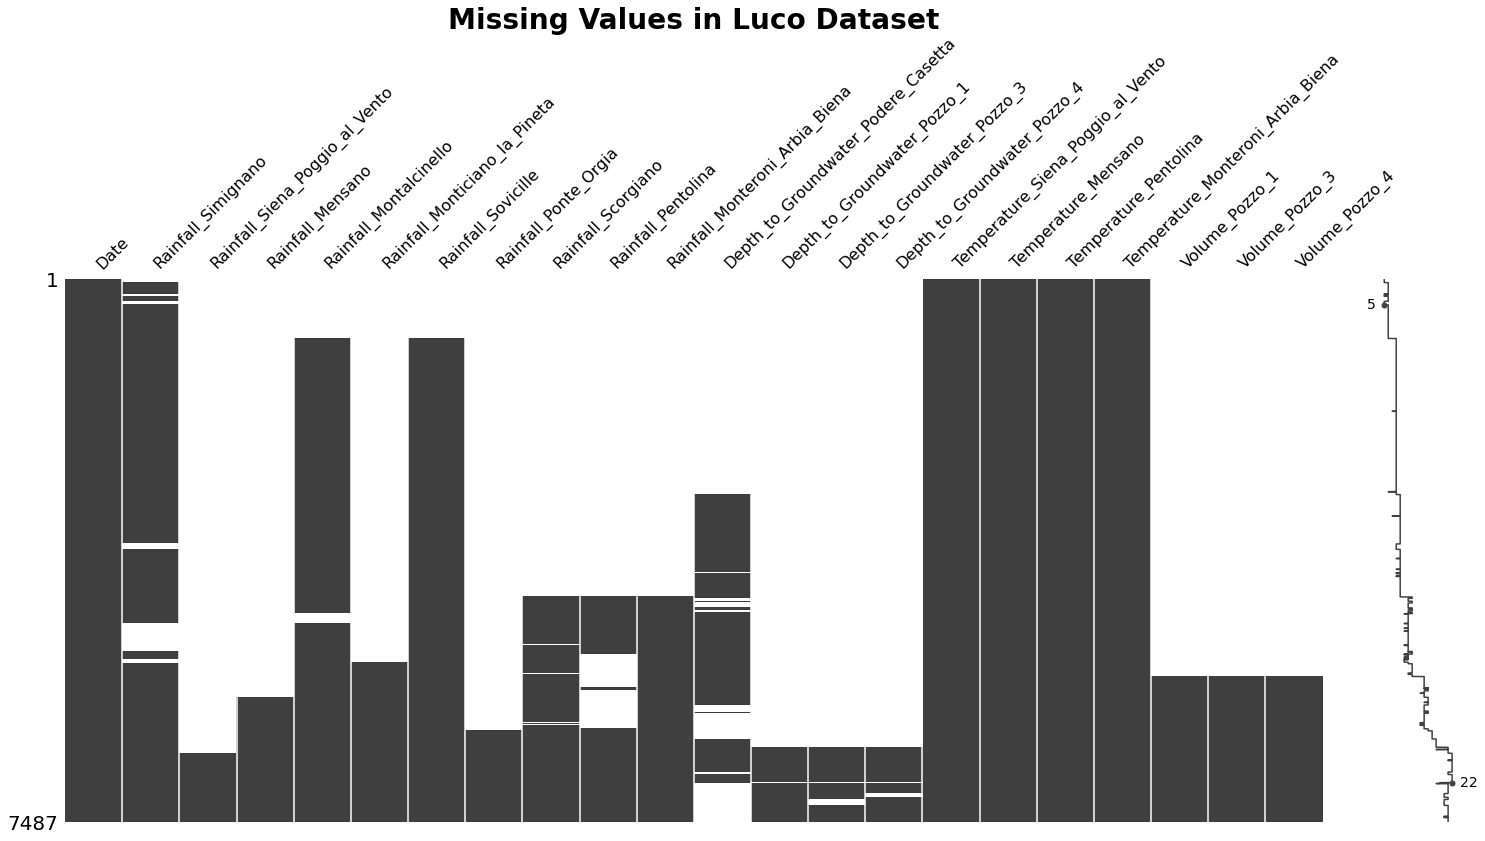

In [115]:
fig = msno.matrix(dfs['luco'], inline=False)
fig.axes.set_title('Missing Values in Luco Dataset', fontsize=28, fontweight='bold')
plt.show()

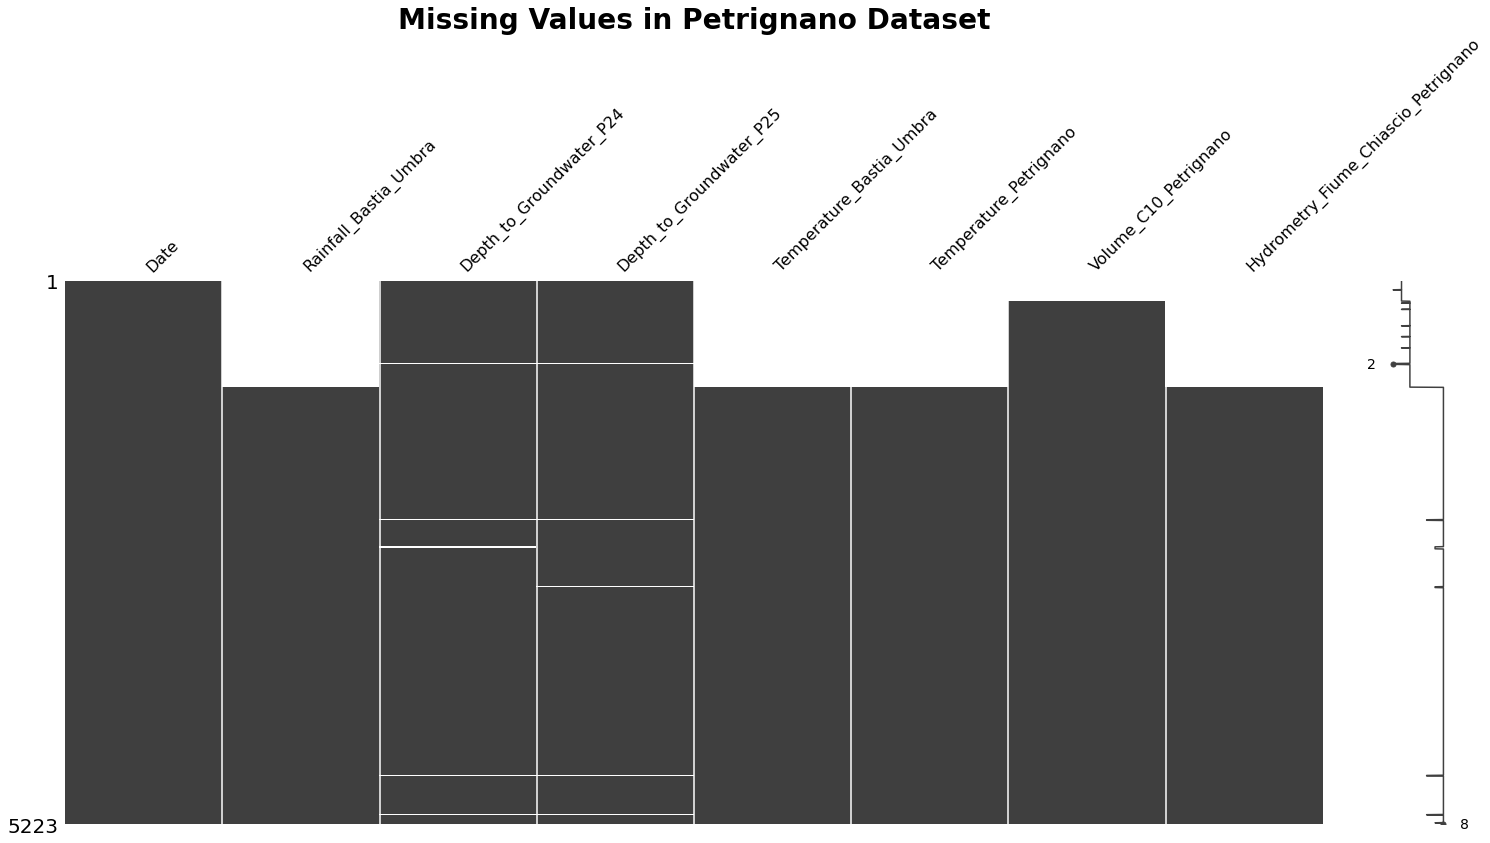

In [116]:
fig = msno.matrix(dfs['petrignano'], inline=False)
fig.axes.set_title('Missing Values in Petrignano Dataset', fontsize=28, fontweight='bold')
plt.show()

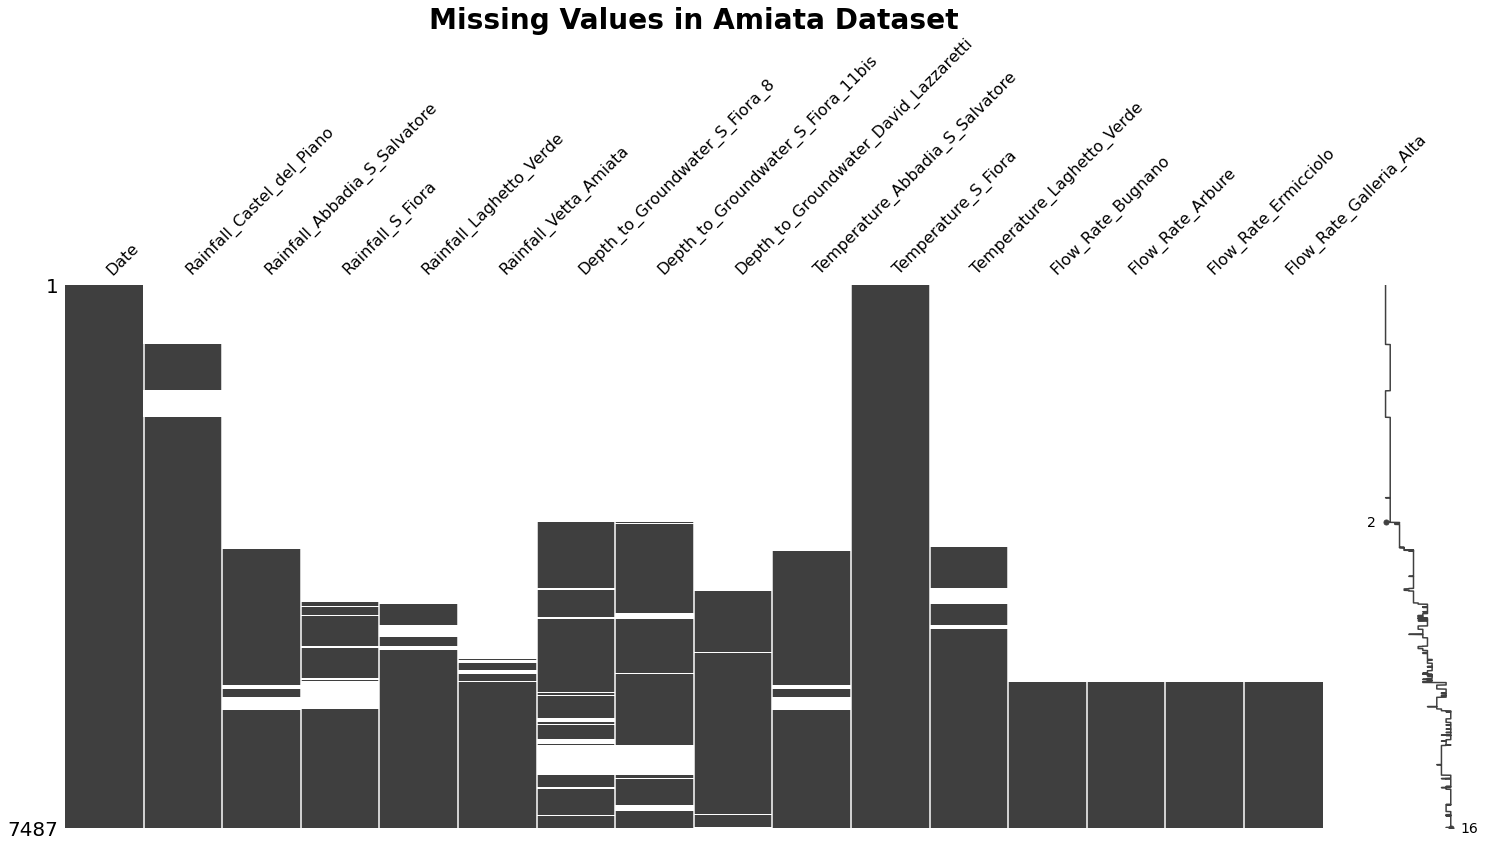

In [117]:
fig = msno.matrix(dfs['amiata'], inline=False)
fig.axes.set_title('Missing Values in Amiata Dataset', fontsize=28, fontweight='bold')
plt.show()

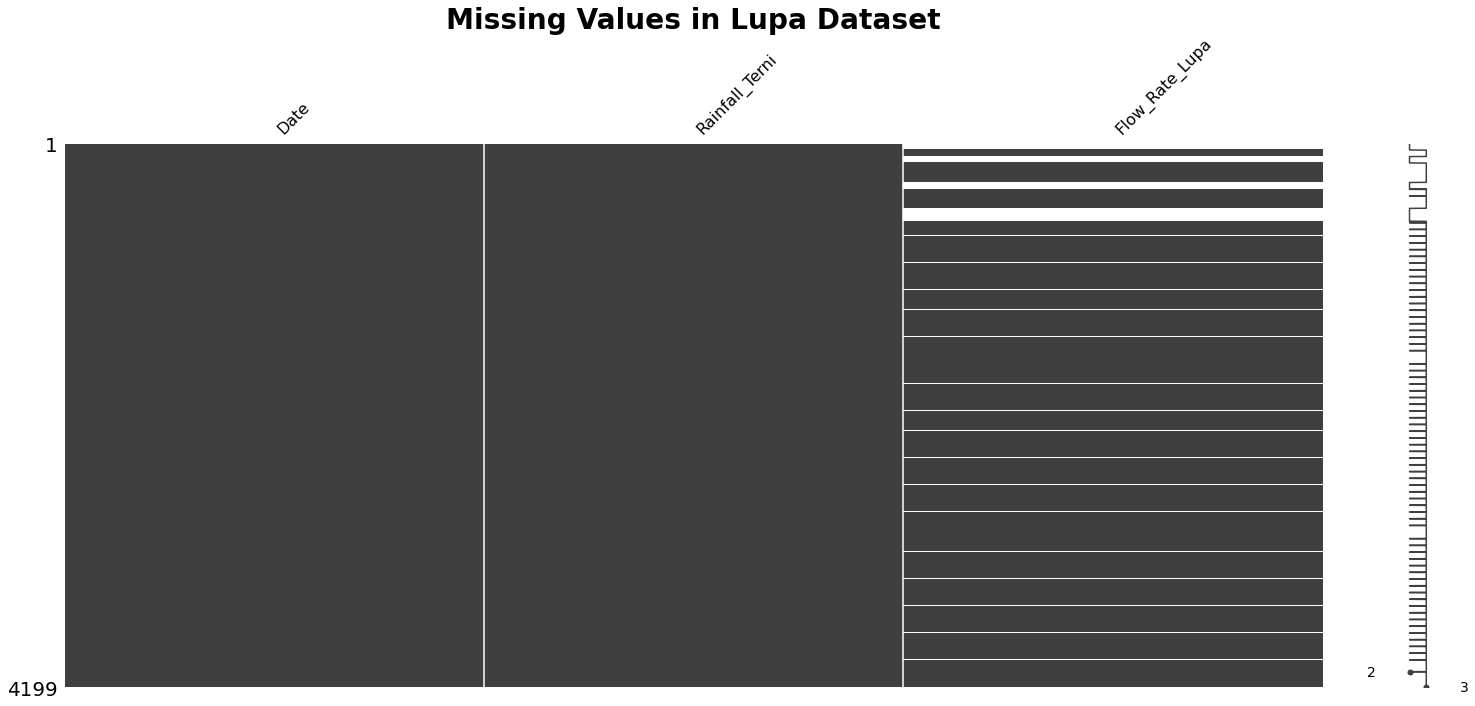

In [118]:
fig = msno.matrix(dfs['lupa'], inline=False)
fig.axes.set_title('Missing Values in Lupa Dataset', fontsize=28, fontweight='bold')
plt.show()

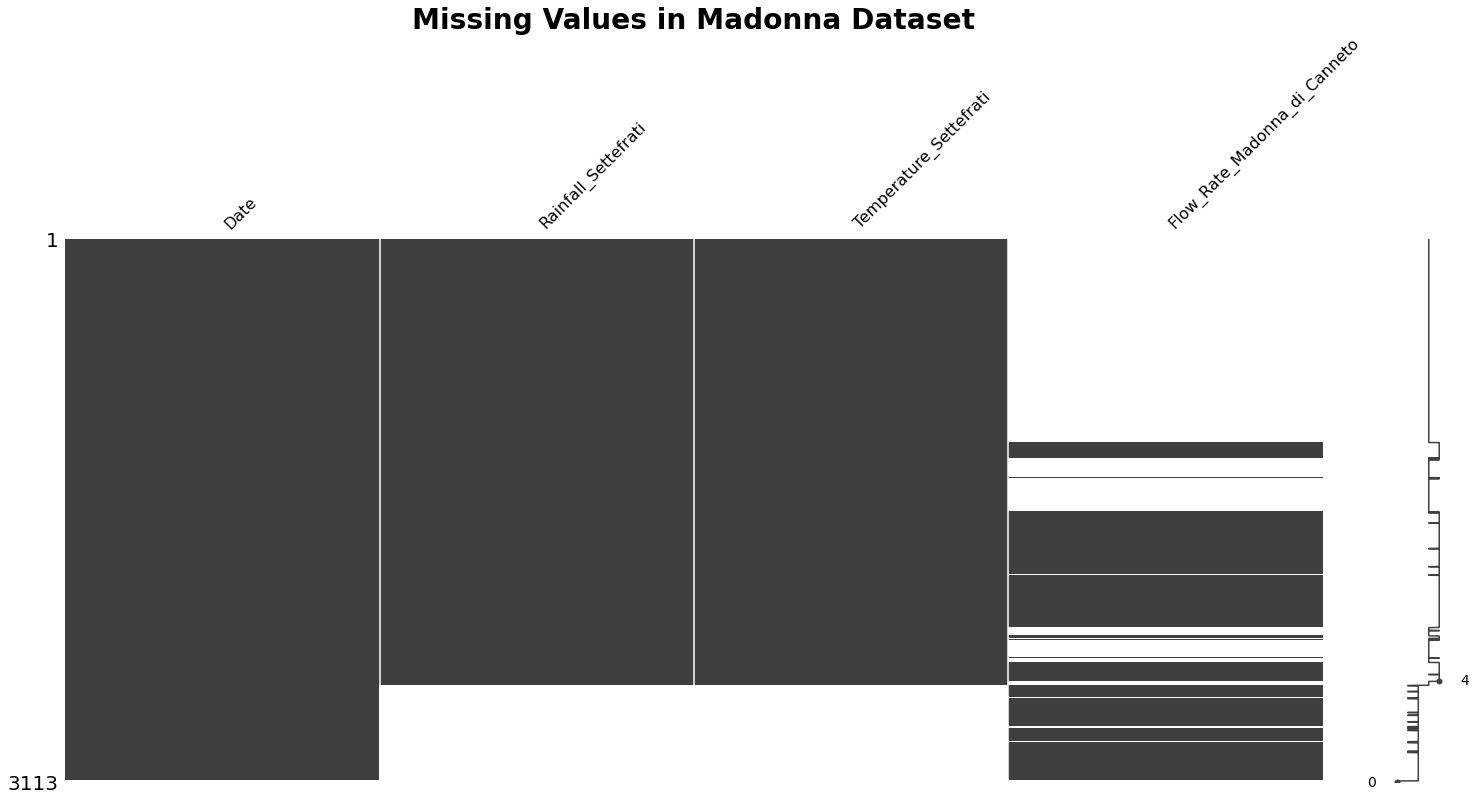

In [119]:
fig = msno.matrix(dfs['madonna_di_canneto'], inline=False)
fig.axes.set_title('Missing Values in Madonna Dataset', fontsize=28, fontweight='bold')
plt.show()

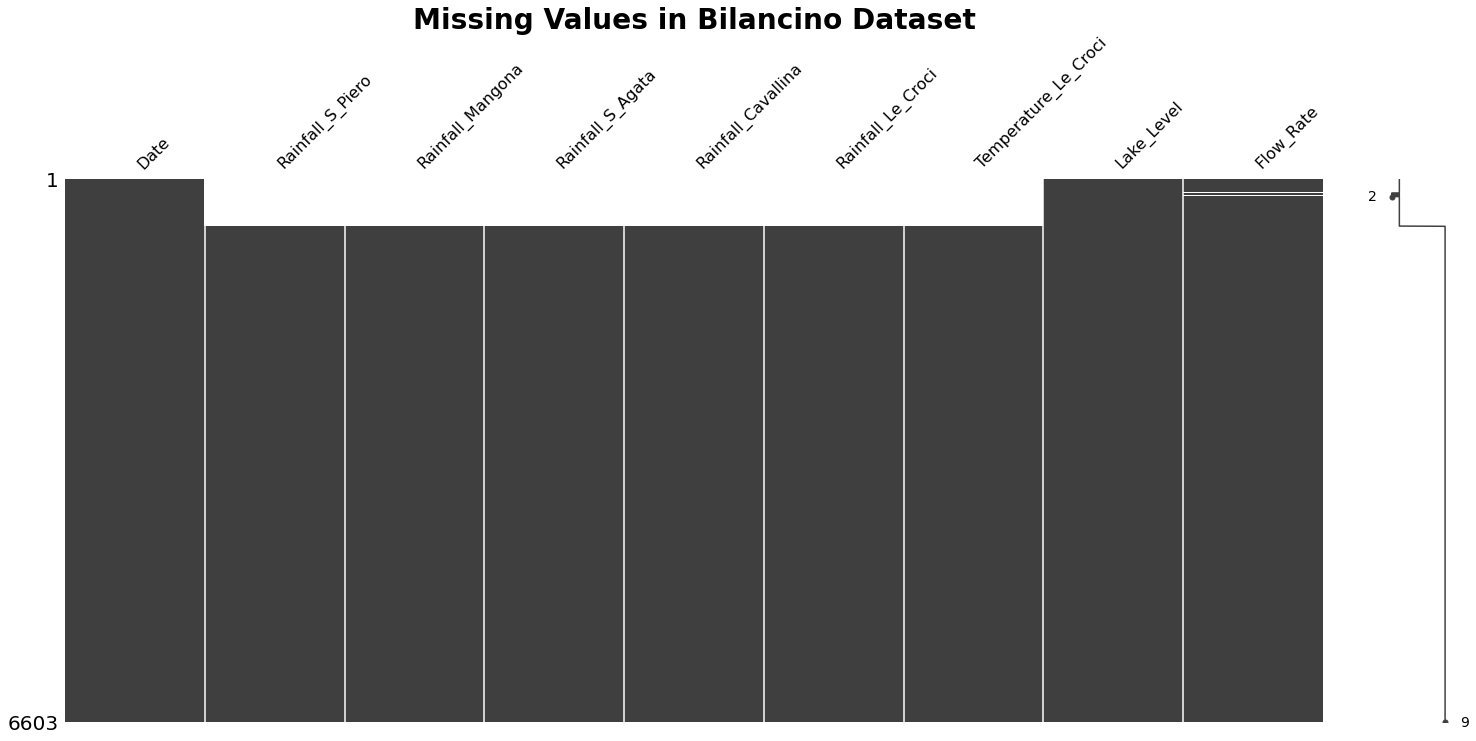

In [120]:
fig = msno.matrix(dfs['bilancino'], inline=False)
fig.axes.set_title('Missing Values in Bilancino Dataset', fontsize=28, fontweight='bold')
plt.show()

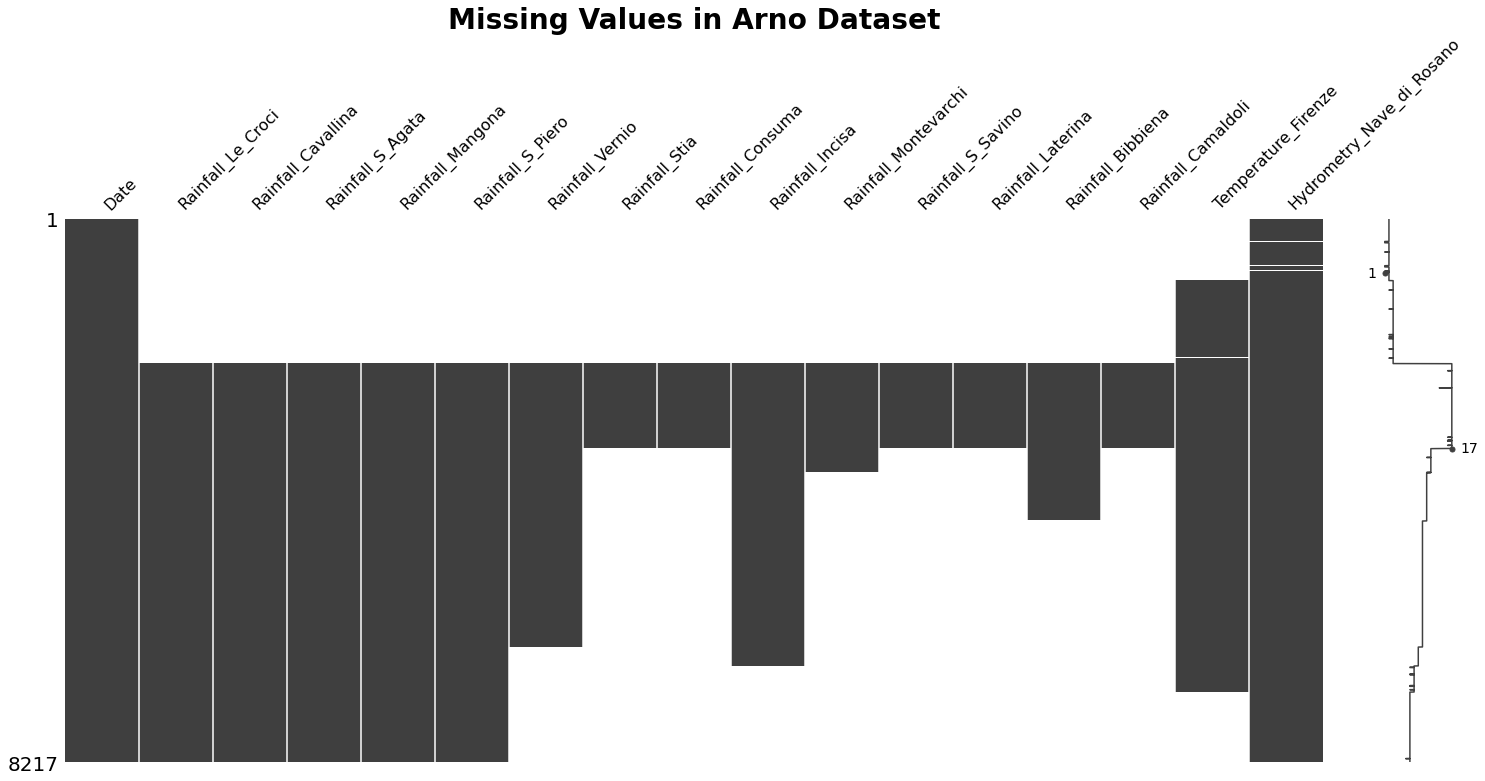

In [121]:
fig = msno.matrix(dfs['arno'], inline=False)
fig.axes.set_title('Missing Values in Arno Dataset', fontsize=28, fontweight='bold')
plt.show()

In [122]:
dfs['bilancino'].isnull().sum()

Date                      0
Rainfall_S_Piero        577
Rainfall_Mangona        577
Rainfall_S_Agata        577
Rainfall_Cavallina      577
Rainfall_Le_Croci       577
Temperature_Le_Croci    578
Lake_Level                0
Flow_Rate                21
dtype: int64

In [123]:
df = dfs['bilancino']
df[df['Flow_Rate'].isnull()]['Date']

175    25/11/2002
176    26/11/2002
177    27/11/2002
178    28/11/2002
179    29/11/2002
180    30/11/2002
181    01/12/2002
189    09/12/2002
190    10/12/2002
191    11/12/2002
192    12/12/2002
193    13/12/2002
194    14/12/2002
195    15/12/2002
210    30/12/2002
211    31/12/2002
212    01/01/2003
213    02/01/2003
214    03/01/2003
215    04/01/2003
216    05/01/2003
Name: Date, dtype: object

Bilancino's `Flow_Rate` is missing three weeks worth of data, each from Monday to the next Sunday:

- 11/25 to 12/1/02
- 12/9 to 12/15 (one week later)
- 12/30 to 1/5/03 (two weeks after that)

In [124]:
ref = df[~df['Rainfall_S_Piero'].isnull()]['Date'].values[0]
assert ref == df[~df['Rainfall_Mangona'].isnull()]['Date'].values[0]
assert ref == df[~df['Rainfall_S_Agata'].isnull()]['Date'].values[0]
assert ref == df[~df['Rainfall_Cavallina'].isnull()]['Date'].values[0]
assert ref == df[~df['Rainfall_Le_Croci'].isnull()]['Date'].values[0]

All rainfall data starts on 1/1/04

In [125]:
df[~df['Temperature_Le_Croci'].isnull()]['Date'].values[0]

'02/01/2004'

Temperature starts on 1/2/04

In [126]:
df.isnull().sum()

Date                      0
Rainfall_S_Piero        577
Rainfall_Mangona        577
Rainfall_S_Agata        577
Rainfall_Cavallina      577
Rainfall_Le_Croci       577
Temperature_Le_Croci    578
Lake_Level                0
Flow_Rate                21
dtype: int64

In [127]:
df[df['Date'] == '01/11/2002']

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
151,01/11/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.79,0.6


In [128]:
df[df['Date'] == '01/02/2003']

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
243,01/02/2003,NaN,NaN,NaN,NaN,NaN,NaN,251.54,4.7


In [129]:
df2 = df.loc[151:243]

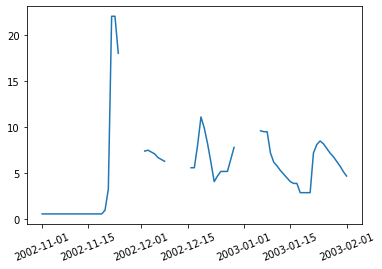

In [130]:
plt.plot(pd.to_datetime(df2['Date'], format='%d/%m/%Y'), df2['Flow_Rate'])
plt.xticks(rotation=22)
plt.show()

In [131]:
df['Flow_Rate'].min()

0.31

In [132]:
df.dtypes

Date                     object
Rainfall_S_Piero        float64
Rainfall_Mangona        float64
Rainfall_S_Agata        float64
Rainfall_Cavallina      float64
Rainfall_Le_Croci       float64
Temperature_Le_Croci    float64
Lake_Level              float64
Flow_Rate               float64
dtype: object

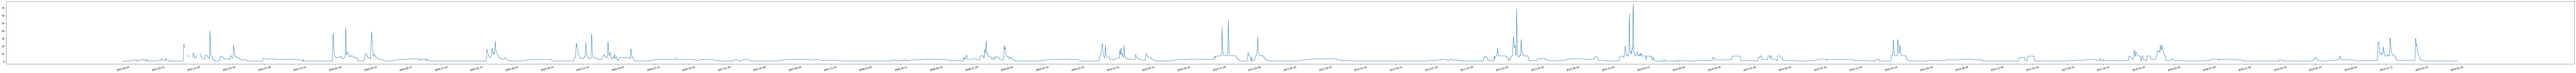

In [133]:
duh = pd.to_datetime(df['Date'], format='%d/%m/%Y')
plt.figure(figsize=(200,5))
plt.plot(duh, df['Flow_Rate'])
plt.xticks(duh[::100], rotation=15)
plt.show()

In [134]:
df['Date'].values[0]

'03/06/2002'

In [135]:
df2 = dfs['arno']

In [136]:
df2[~df2['Rainfall_Le_Croci'].isnull()]['Date'].values[0]

'01/01/2004'

In [137]:
for wb in dfs:
    d = dfs[wb]['Date'].values
    print(wb, '...', d[0], '...', d[-1])

auser ... 05/03/1998 ... 30/06/2020
doganella ... 01/01/2004 ... 30/06/2020
luco ... 01/01/2000 ... 30/06/2020
petrignano ... 14/03/2006 ... 30/06/2020
amiata ... 01/01/2000 ... 30/06/2020
lupa ... 01/01/2009 ... 30/06/2020
madonna_di_canneto ... 01/01/2012 ... nan
bilancino ... 03/06/2002 ... 30/06/2020
arno ... 01/01/1998 ... 30/06/2020


In order of "appearance":

- 1/1/98: Arno
- 3/5/98: Auser
- 1/1/00: Amiata, Luco
- 6/3/02: Bilancino
- 1/1/04: Doganella
- 3/14/06: Petrignano
- 1/1/09: Lupa
- 1/1/12: Madonna di Canneto

All data "halts" at 6/30/20

In [138]:
dfs['madonna_di_canneto']['Date'].dropna().values[-1]

'30/06/2020'

In [139]:
ov = pd.read_csv('../../data/meta/overview.csv')

In [140]:
ov.head()

,Location,Measurement,Waterbody,Feature,Target,StationID,Latitude,Longitude,Elevation
0,DIEC,Depth_to_Groundwater,auser,1,0,NaN,NaN,NaN,NaN
1,PAG,Depth_to_Groundwater,auser,1,0,NaN,NaN,NaN,NaN
2,Monte_S_Quirico,Hydrometry,auser,1,0,TOS02004291,43.857255,10.506863,25.0
3,Piaggione,Hydrometry,auser,1,0,TOS02004284,43.929353,10.514275,72.0
4,Borgo_a_Mozzano,Rainfall,auser,1,0,TOS02004271,43.979877,10.551510,100.0


In [141]:
pd.set_option('display.max_rows', None)
dfish = ov.groupby(['Location', 'Measurement'], as_index=False)['Feature'].mean()
c1 = dfish['Feature'] > 0
c2 = dfish['Feature'] < 1
dfish[c1 & c2]

,Location,Measurement,Feature
67,Pozzo_1,Depth_to_Groundwater,0.5
71,Pozzo_3,Depth_to_Groundwater,0.5
73,Pozzo_4,Depth_to_Groundwater,0.5
